# Regresión lineal con mínimos cuadrados

En estadística, la regresión lineal es un enfoque lineal para modelar la relación entre una variable dependiente y una o más variables independientes. En el caso de una variable independiente, se denomina regresión lineal simple.
Siempre que se cumplan algunos supuestos básicos, la regresión lineal que utiliza mínimos cuadrados se puede resolver con exactitud, sin necesidad de aproximación.

Esto significa que las ecuaciones presentadas en las clases del módulo se pueden adaptar directamente al código `Python`, lo que lo convierte en una buena práctica tanto para usar` Python` como para traducir un "algoritmo" a código.

Para obtener el resultado deseado, usaremos la misma versión matricial de la solución de mínimos cuadrados presentada en las clases. Como recordatorio, el vector de pesos que estamos tratando de encontrar, $w_{LS}$, se puede calcular mediante:

$$w_{LS} = (X^T X)^{−1}X^T y,$$

donde $X$ es la matriz de entradas y $y$ es el vector de salida del conjunto de entrenamiento.

En esta ecuación, $X$ siempre se define para tener un vector de valores de $1$ como su primera columna. En otras palabras, incluso cuando solo hay un valor de entrada para cada punto de datos, $X$ toma la forma:

$$
X = \begin{bmatrix}
1 \  x_{11}  \\
1 \  x_{21}  \\
\vdots \ \vdots \\
1 \ x_{n1}
\end{bmatrix} 
$$

De manera similar, para dos entradas por punto de datos, $X$ tomará esta forma:
 
$$
X = \begin{bmatrix}
1 \  x_{11} \  x_{12} \\
1 \  x_{21} \  x_{22} \\
\vdots \ \vdots \\
1 \ x_{n1} \  x_{n2}
\end{bmatrix} 
$$

### Importación del conjunto de datos y análisis de datos exploratorios

Intentaremos predecir los precios viviendas utilizando el área de vivienda sobre el suelo con un modelo de regresión en un conjunto de datos de precios de la vivienda. Puede encontrar más información sobre este conjunto de datos [aquí](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

Antes de codificar un algoritmo, echaremos un vistazo a nuestros datos usando los `pandas` de` Python`. Para las visualizaciones usaremos `matplotlib`.

Vamos a importar las bibliotecas necesarias y cargar los conjuntos de datos que usaremos usando la función pandas `pd.read_csv()`.

In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

tr_path = 'data/houses.csv'
data = pd.read_csv(tr_path)

In [18]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [19]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Pregunta 1:

¿Cuántas columnas hay en "data"? Asigne el resultado como entero a `ans1`.

**SUGERENCIA:** Utilice la función `len()` junto con el atributo `columns`.

In [21]:
ans1 = len(data.columns)
ans1

81

A continuación, grafiquemos la relación entre nuestras variables de interés: el precio de cada casa y la superficie habitable sobre el suelo en pies cuadrados.

Podemos hacerlo creando un diagrama de dispersión usando `matplotlib`.

Text(0, 0.5, 'SalePrice')

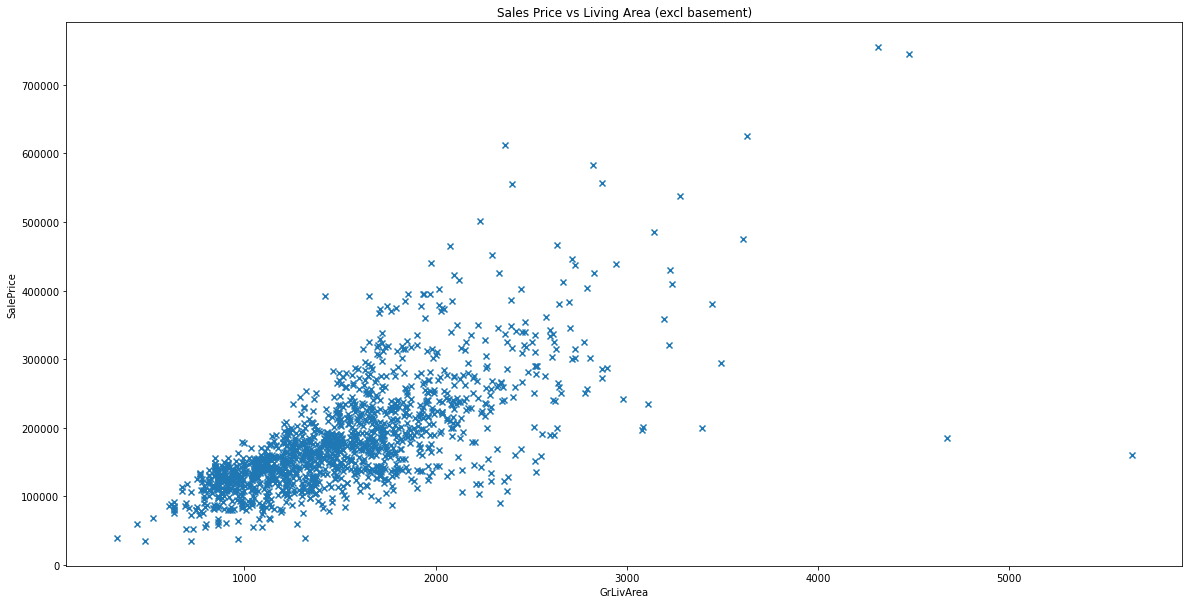

In [22]:
Y = data['SalePrice']
X = data['GrLivArea']

plt.scatter(X, Y, marker = 'x')

plt.title('Sales Price vs Living Area (excl basement)')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

### Pregunta 2:


Dado el gráfico anterior, parece que hay un:
- True: correlación positiva entre las variables
- False: correlación negativa entre las variables

Asigne el valor booleano correspondiente a su elección a `ans2`.

In [23]:
ans2 = True

## Codifiquemos la regresión lineal

Dada la ecuación anterior para $w_{LS}$, tenemos todo lo que necesitamos para resolver una regresión lineal. En las siguientes preguntas, definiremos todas las funciones necesarias de `Python` para completar paso a paso.

#### Ejemplo de función de codificación: Matriz inversa
A continuación se muestra un ejemplo de una función que toma la inversa de una matriz. Usamos el módulo `numpy` y la función `np.linalg.inv()`. Aunque es simple, esto se puede usar como plantilla para algunas buenas prácticas de codificación:

* Nombrar funciones y parámetros de forma descriptiva
* Use guiones bajos _para separar palabras en nombres de variable / función (snake_case, **NO** PascalCase o camelCase)
* En funciones y clases, incluya una cadena de documentos entre comillas triples

In [25]:
def inverse_of_matrix(A):
    """
    Calcula el inverso multiplicativo de una matriz A
    
    Positional argument:
    A -- una matriz cuadrada invertible (determinante distinto de cero)
    """
    return np.linalg.inv(A)

In [26]:
sample_matrix = [[1, 2], [3, 4]]
inversa = inverse_of_matrix(sample_matrix)
inversa

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

### Pregunta 3:

Cree una función `read_to_df` que tome, como entrada, el file_path de un archivo .csv y use la función `pandas` apropiada para leer el archivo .csv en un dataframe `df`. Tu función debería devolver `df`.

In [27]:
def read_to_df(path):
    return pd.read_csv(path)

In [29]:
read_to_df('data/houses.csv')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Pregunta 4:

Defina una función llamada `select_columns` que tome como entradas, un dataframe `df` y una *list* de nombres de columna. Su función debe devolver un dataframe que solo tenga las columnas especificadas en la lista de nombres de columna.

In [41]:
def select_columns(df, column_names):
    return df[column_names]

In [35]:
data = read_to_df('data/houses.csv')
selected_columns = ['SalePrice', 'GrLivArea', 'YearBuilt']
sub_df = select_columns(data, selected_columns)
sub_df.head(3)

,SalePrice,GrLivArea,YearBuilt
0,208500,1710,2003
1,181500,1262,1976
2,223500,1786,2001


### Pregunta 5:

Cree una función llamada `column_cutoff` que tome, como entrada, un dataframe de `pandas` y una lista de tuplas. Las tuplas deben tener el siguiente formato: `(column_name, min_value, max_value)`. Su función debe devolver un dataframe que excluya las filas en las que el valor en una columna especificada excede el `max_value` o es menor que el `min_value`.

**NOTA**: NO elimine filas si el valor de la columna es igual al valor mínimo / máximo

In [36]:
def column_cutoff(df, cutoffs):
    df2 = df
    
    for value in cutoffs:
        df2 = df2.loc[df2[value[0]] > value[1], :]
        df2 = df2.loc[df2[value[0]] < value[2], :]
    
    return df2

In [42]:
data = read_to_df('data/houses.csv')
selected_columns = ['SalePrice', 'GrLivArea', 'YearBuilt']
sub_df = select_columns(data, selected_columns)
cutoffs = [('SalePrice', 50000, 1e10), ('GrLivArea', 0, 4000)]
selected_data = column_cutoff(sub_df, cutoffs)
selected_data.head()

,SalePrice,GrLivArea,YearBuilt
0,208500,1710,2003
1,181500,1262,1976
2,223500,1786,2001
3,140000,1717,1915
4,250000,2198,2000


En la siguiente pregunta, calculará $w_{LS}$ utilizando la función de matriz inversa.

$$w_{LS} = (X^T X)^{−1}X^T y,$$


### Pregunta 6:


Cree una función llamada `least_squares_weights` que tome, como entrada, dos matrices correspondientes a las entradas `X` y el target `y` (suponga que las matrices son de las dimensiones correctas), respectivamente. Su función debe ejecutar los siguientes pasos:

- 1) Asegúrese de que el número de filas de cada matriz sea mayor o igual al número de columnas. Si no es así, transponga las matrices. En particular, la entrada y debería terminar como una matriz $n\times1$ y la entrada x como una matriz $n\times 1$

- 2) Anteponer una columna $n \times 1$ de unos a la matriz de entrada x

- 3) Utilice la ecuación anterior para calcular el peso por mínimos cuadrados y devuelva este vector.

*Nota*: Utilice las funciones `.shape`,` np.matmul`, `np.linalg.inv`,` np.ones` y `np.transpose`.

In [69]:
def least_squares_weights(X, y):
    X = X.T if X.shape[0] < X.shape[1] else X
    y = y.T if y.shape[0] < y.shape[1] else y
    
    ones = np.ones((X.shape[0], 1))
    X_ones = np.hstack((ones, X))
    
    w_ls = np.matmul(np.linalg.inv(np.matmul(X_ones.T, X_ones)), np.matmul(X_ones.T, y))
    
    return w_ls

In [70]:
df = read_to_df(tr_path)
df_sub = select_columns(df, ['SalePrice', 'GrLivArea', 'YearBuilt'])

X = df_sub['GrLivArea'].values
y = df_sub['SalePrice'].values

training_y = np.array([y])
training_X = np.array([X])

weights = least_squares_weights(training_X, training_y)
print(weights)

[[18569.02585649]
 [  107.13035897]]


En la celda de abajo, graficamos el precio de cada casa frente al área habitable sobre el suelo en pies cuadrados y la línea de mínimos cuadrados que acabamos de obtener con nuestro código.

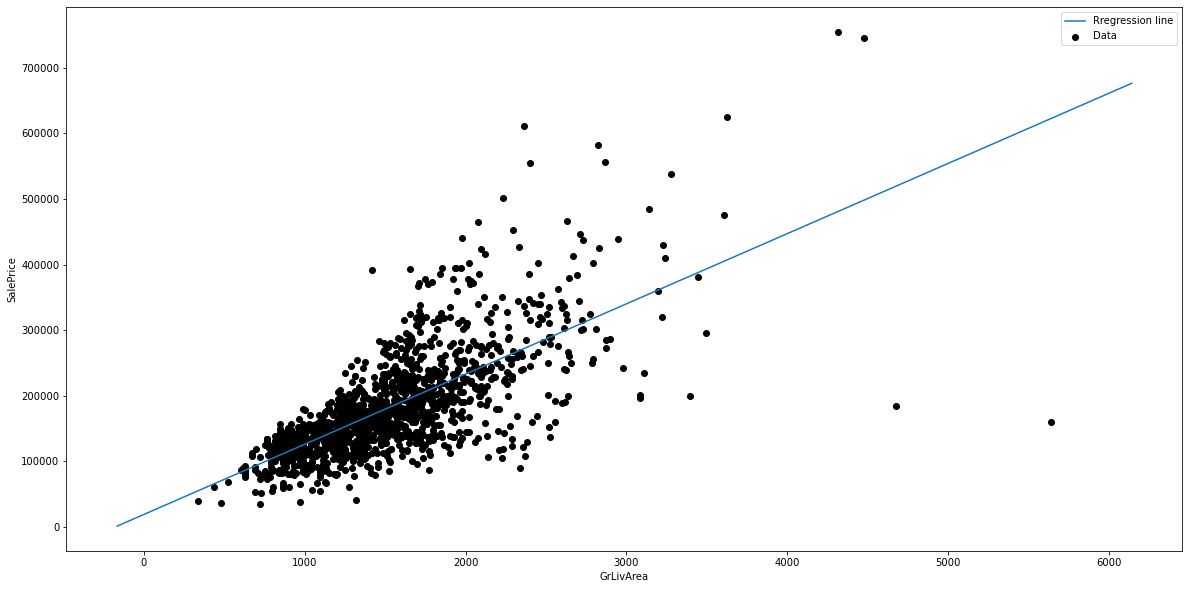

In [76]:
max_X = np.max(X) + 500
min_X = np.min(X) - 500
# escojemos puntos equidistantes en el intervalo (min_X, max_X)
reg_x = np.linspace(min_X, max_X, 1000)
# usamos la ecuación de la recta para calcular los valores de y
reg_y = weights[0] + weights[1] * reg_x

plt.plot(reg_x, reg_y, label = 'Rregression line')
plt.scatter(X, y, c = 'k', label = 'Data')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

### Implementación de sklearn de regresión lineal con mínimos cuadrados

Si bien es útil construir y programar nuestro modelo desde cero, este curso también presentará cómo usar métodos convencionales para adaptarse a cada modelo. La regresión lineal con mínimos cuadrados está convenientemente implementada en el módulo `scikit-learn` (también llamado` sklearn`).

En la siguiente pregunta, le pediremos que implemente linear regression en `sklearn`. Puede encontrar toda la información que necesita [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).


### Pregunta 8:


Utilice la función `LinearRegression` de` sklearn` para crear una instancia del modelo `lr`.

Defina un dataframe `skl_X` de la característica `GrLivArea` en `df_sub` y una serie de pandas `skl_y` de la característica `SalePrice` en `df_sub`.

Utilice la función `fit()` para ajustar `sk_ X` y `skl_y` al modelo.

In [78]:
from sklearn.linear_model import LinearRegression

skl_X = df_sub[['GrLivArea']]
skl_y = df_sub[['SalePrice']]

lr = LinearRegression().fit(skl_X, skl_y)

In [79]:
# sklearn nos da los siguientes resultados para la regresión lineal

print('la ordenada al origen de la recta de regresión es:', lr.intercept_)
print('la pendiente de la recta de regresión es:', lr.coef_)

la ordenada al origen de la recta de regresión es: [18569.02585649]
la pendiente de la recta de regresión es: [[107.13035897]]
